## About

This plot is a [Choropleth map](https://python-graph-gallery.com/choropleth-map/). It shows the cancer rate per country is various European countries using the SHARE Survey data.

The chart was made by [Joseph B.](https://www.barbierjoseph.com/). Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

<img src="../../static/graph/web-map-europe-with-color-by-country.png" alt="final map">

## Libraries

First, you need to install the following librairies:
- [matplotlib](https://python-graph-gallery.com/matplotlib/) is used for creating the chart and add customization features
- [pandas](https://python-graph-gallery.com/pandas/) and `geopandas` are used to put the data into a dataframe and manipulate geographical data

And that's it!

In [1]:
# plot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# data
import pandas as pd
import geopandas as gpd

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's Github repo](https://www.react-graph-gallery.com). This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.

The dataset contains one row per country and the associated cancer rate.

In [2]:
# Open the dataset from Github
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/cancer_rate.csv"
url = "../../static/data/cancer_rate.csv"
cancer_rates = pd.read_csv(url)

## Get map positions

Since our dataset contains only the country name and the cancer rate, we need to find a way to get actual country shape to put in our plot. For this we need to load a mapping dataset that you can get at [Natural Earth Data](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/) (`Download countries` button). Then unzip it and get the `.shp` file and load it.

In [4]:
# world map (Replace with your path)
world = gpd.read_file("../../static/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# filter on europe only
europe = world[world['CONTINENT'] == 'Europe']

Once we get that file, we need to merge it with our actual dataset:

In [5]:
data = europe.merge(cancer_rates, how='left', left_on='NAME', right_on='Country')
data.dropna(subset=['Cancer'], inplace=True)
data['Cancer'] = round(data['Cancer']*100,1)

## Create the map

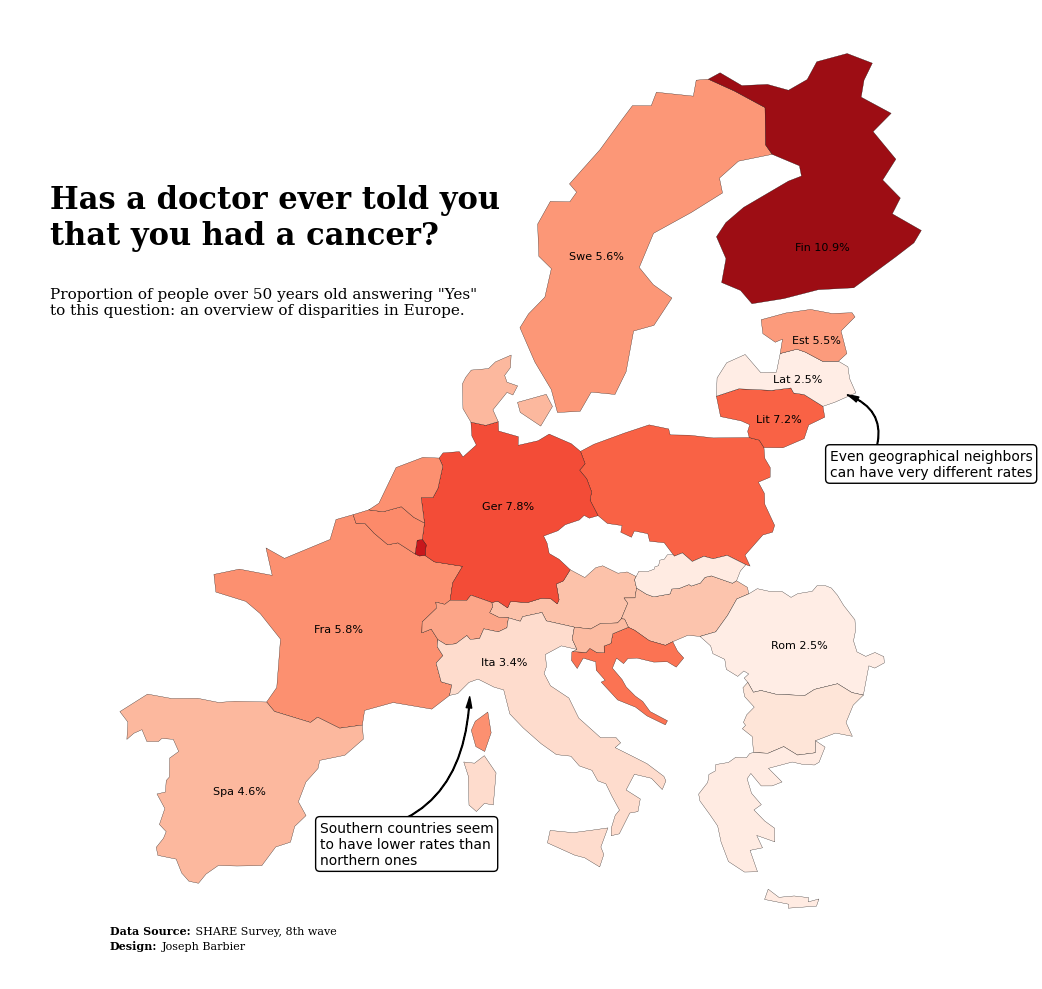

In [92]:
import matplotlib.patches as patches

# colors
cmap = cm.Reds
col = 'white'

# average cancer rate
avg_cancer = data['Cancer'].mean()

# normalize in order to control "intensity" of the colormap
min_rate, max_rate = 2, 12
norm = mcolors.Normalize(vmin=min_rate, vmax=max_rate)

# axis properties
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_xlim(-15, 35)
ax.set_ylim(32, 72)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_yticks([])
ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)

# annotations (defined with trial and error until it looked good)
year = 2019
wave = 8
fig.text(0.2, 0.75, 'Has a doctor ever told you\nthat you had a cancer?', fontsize=22, fontweight='bold', fontfamily='serif')
fig.text(0.2, 0.68, f'Proportion of people over 50 years old answering "Yes"\nto this question: an overview of disparities in Europe.',
            fontsize=11, fontweight='ultralight', fontfamily='serif')
fig.text(0.24, 0.06, 'Data Source:', fontsize=8, fontweight='bold', fontfamily='serif')
fig.text(0.295, 0.06, f' SHARE Survey, {wave}th wave', fontsize=8, fontweight='light', fontfamily='serif')
fig.text(0.24, 0.045, 'Design:', fontsize=8, fontweight='bold', fontfamily='serif')
fig.text(0.275, 0.045, 'Joseph Barbier', fontsize=8, fontweight='light', fontfamily='serif')

# background color
ax.set_facecolor(col)
fig.set_facecolor(col)

# compute centroids for annotations
data_projected = data.to_crs(epsg=3035)
data_projected['centroid'] = data_projected.geometry.centroid
data['centroid'] = data_projected['centroid'].to_crs(data.crs)
countries_to_annotate = ['France', 'Italy', 'Romania',
                        'Lithuania', 'Finland', 'Estonia',
                        'Latvia', 'Spain', 'Germany',
                        'Sweden']
#countries_to_annotate = data['Country'].values

# Ajdustments for annotations since centroid is
# not a perfect measure of the center of a country
adjustments = {
    'France': (9, 3),  
    'Italy': (-2.4, 2),
    'Lithuania': (0, -0.6),
    'Finland': (0, -2.5),
    'Romania': (0, -0.5),
    'Bulgaria': (0, -0.6),
    'Greece': (-1.2, -0.8),
    'Croatia': (0, -1),
    'Cyprus': (0, -1),
    'Ireland': (0, -1),
    'Malta': (0, -1),
    'Slovenia': (0, -1),
    'Slovakia': (-0.7, -0.8),
    'Estonia': (0, -0.7),
    'Latvia': (0, -0.5),
    'Belgium': (0, -0.7),
    'Austria': (0, -1),
    'Spain': (0, -1),
    'Portugal': (-0.5, -1),
    'Luxembourg': (0, -1),
    'Germany': (-0.2, 0),
    'Hungary': (-0.3, -1),
    'Czechia': (0, -1),
    'Poland': (0, -1),
    'Sweden': (-1.5, -1),
    'Denmark': (0, -1),
    'Netherlands': (0, 0),
    'United Kingdom': (0, -1),
    'Switzerland': (0, -0.5),
}

# plot map
data.plot(column='Cancer', ax=ax, cmap=cmap, norm=norm, edgecolor='black', linewidth=0.2)

# annotate countries
for country in countries_to_annotate:

    # get centroid
    centroid = data.loc[data['NAME'] == country, 'centroid'].values[0]
    x, y = centroid.coords[0]
    
    # adjust
    x += adjustments[country][0]
    y += adjustments[country][1]

    # get cancer rate and annotate
    rate = data.loc[data['NAME'] == country, 'Cancer'].values[0]
    ax.annotate(f'{country[:3]} {rate}%', (x, y), textcoords="offset points", xytext=(5,5),
                ha='center', fontsize=8, fontfamily='DejaVu Sans', color='black')
    
#  (OPTIONAL) add colorbar for reference
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# cbaxes = inset_axes(ax, width="30%", height="3%", loc='lower left', 
#                     bbox_to_anchor=(0.05, 0.65, 1.2, 1),
#                     bbox_transform=ax.transAxes, borderpad=0)
# cbar = fig.colorbar(sm, cax=cbaxes, orientation='horizontal')
# cbar.ax.tick_params(labelsize=12)

# bloc of text on the right
fig.text(0.72, 0.53, 'Even geographical neighbors\ncan have very different rates',
         fontsize=10,
         fontweight='ultralight',
         verticalalignment='center',
         bbox=dict(boxstyle='round',
                   facecolor='white'),
        fontfamily='DejaVu Sans')
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
start_point = (0.75, 0.54)
end_point = (0.73, 0.6)
arrow1 = patches.FancyArrowPatch(start_point, end_point,
                             connectionstyle="arc3,rad=.5",
                             transform=fig.transFigure,
                             **kw)
ax.add_patch(arrow1)

# bloc of text on the bottom
fig.text(0.38, 0.15, 'Southern countries seem\nto have lower rates than\nnorthern ones',
         fontsize=10,
         fontweight='ultralight',
         verticalalignment='center',
         bbox=dict(boxstyle='round',
                   facecolor='white'),
        fontfamily='DejaVu Sans')
style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")
start_point = (0.38, 0.16)
end_point = (0.48, 0.3)
arrow2 = patches.FancyArrowPatch(start_point, end_point,
                             connectionstyle="arc3,rad=.5",
                             transform=fig.transFigure,
                             **kw)
ax.add_patch(arrow2)

plt.tight_layout()
fig.savefig('../../../../Desktop/test.png', dpi=300, bbox_inches='tight')
plt.show()

## Going further

This article explains how to reproduce a [choropleth map](https://python-graph-gallery.com/choropleth-map/) with annotations, colormap and nice features. 

For more examples of **advanced customization** in map, check out [choropleth map of America](https://python-graph-gallery.com/choropleth-map-geopandas-python/). Also, you might be interested in [creating interactive map](https://python-graph-gallery.com/292-choropleth-map-with-folium/) with Folium. 